# **_LABORATORIO 17_**

In [49]:
#Just in Case
import warnings
warnings.filterwarnings('ignore')

#Importando las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm

 
from graphviz import Source
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text, plot_tree
from imblearn.under_sampling import RandomUnderSampler #Para llevar a cabo UnderSampling
from sklearn.metrics import confusion_matrix, auc, roc_curve
from sklearn.preprocessing import label_binarize
from mlxtend.plotting import plot_decision_regions

In [50]:
#Estableciendo el directorio de trabajo
os.chdir('D:\Social Data Consulting\Python for Data Science\data')

In [51]:
mifichero="UCI_Credit_Card.csv"
creditcard=pd.read_csv(mifichero)
creditcard.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [52]:
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [53]:
creditcard.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [54]:
pd.value_counts(creditcard['default.payment.next.month'])

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [55]:
predictores=['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
target=['default.payment.next.month']

In [56]:
del creditcard['ID']

### **_1. Construir data de entrenamiento y testeo_**

In [57]:
creditcard.shape[1]

24

In [58]:
X=creditcard.iloc[:,0:creditcard.shape[1]-1].values
y=creditcard.iloc[:,creditcard.shape[1]-1].values

In [59]:
xtrain,xtest,ytrain,ytest=train_test_split(X,
                                           y,
                                           test_size=0.2,
                                           random_state=2020,
                                           stratify=y)

In [60]:
#Datos de entrenamiento
df_xtrain= pd.DataFrame(xtrain,columns=predictores)
df_ytrain= pd.DataFrame(ytrain,columns=target)

df_creditcard_entrenamiento = pd.concat([df_xtrain,df_ytrain], axis=1)
df_creditcard_entrenamiento.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,110000.0,1.0,2.0,1.0,36.0,1.0,2.0,0.0,0.0,0.0,...,105373.0,71733.0,61020.0,0.0,4308.0,3196.0,2536.0,2322.0,2001.0,0
1,50000.0,2.0,2.0,2.0,26.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,2525.0,0.0,0.0,0.0,0.0,0
2,140000.0,2.0,2.0,2.0,49.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,3794.0,0.0,865.0,367.0,0.0,3794.0,0.0,865.0,825.0,1
3,50000.0,1.0,3.0,1.0,47.0,0.0,0.0,0.0,2.0,0.0,...,15181.0,15928.0,16671.0,2000.0,2000.0,1000.0,1000.0,1000.0,1000.0,0
4,20000.0,1.0,2.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,54.0,54.0,54.0,0.0,0.0,0.0,0.0,0.0,2966.0,1


### **_2. Utilizar UnderSampling para balanceo de datos, teniendo en cuenta los siguientes parámetros: 07 para proporción de etiquetas poco representadas y 2020 como semilla._**

In [61]:
count_classes=pd.value_counts(df_creditcard_entrenamiento['default.payment.next.month'])
count_classes

0    18691
1     5309
Name: default.payment.next.month, dtype: int64

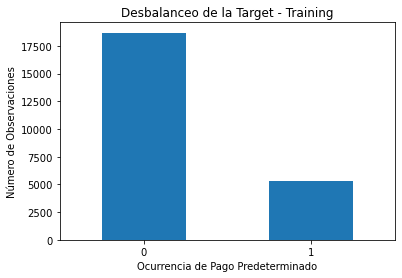

In [62]:
#Graficando el Desbalanceo de la Target en el Training Set
count_classes.plot(kind='bar',rot=0)
plt.title('Desbalanceo de la Target - Training')
plt.xlabel('Ocurrencia de Pago Predeterminado')
plt.ylabel('Número de Observaciones')
plt.show()

In [63]:
#Primero creamos una instancia de NearMiss
us=RandomUnderSampler(sampling_strategy=0.7,random_state=2020)

In [64]:
#fit_resample me arroja 2 objetos ya balanceados
xtrain_under,ytrain_under= us.fit_resample(xtrain,ytrain)

In [65]:
#Datos de Entrenamiento DF
xtrain_under_df=pd.DataFrame(xtrain_under,columns=predictores)
ytrain_under_df=pd.DataFrame(ytrain_under,columns=target)

xtest_df=pd.DataFrame(xtest,columns=predictores)
ytest_df=pd.DataFrame(ytest,columns=target)


df_creditcard_entrenamiento=pd.concat([xtrain_under_df,ytrain_under_df],axis=1)
df_creditcard_test=pd.concat([xtest_df,ytest_df],axis=1)
df_creditcard_entrenamiento.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,30000.0,1.0,3.0,1.0,59.0,0.0,0.0,0.0,0.0,0.0,...,21624.0,21833.0,18174.0,1404.0,1268.0,694.0,866.0,695.0,838.0,0
1,50000.0,1.0,3.0,2.0,26.0,0.0,0.0,0.0,0.0,0.0,...,20284.0,19166.0,19567.0,1537.0,1947.0,800.0,1000.0,718.0,683.0,0
2,360000.0,2.0,2.0,2.0,33.0,-1.0,-1.0,-1.0,-1.0,0.0,...,4912.0,1150.0,0.0,9860.0,8537.0,4912.0,0.0,0.0,9294.0,0
3,340000.0,2.0,2.0,2.0,43.0,0.0,0.0,2.0,0.0,0.0,...,114379.0,113627.0,112193.0,12002.0,0.0,4387.0,4634.0,4519.0,2402.0,0
4,450000.0,1.0,1.0,2.0,28.0,-1.0,0.0,0.0,0.0,-1.0,...,19585.0,9756.0,3282.0,3000.0,10000.0,3000.0,10000.0,3300.0,326.0,0


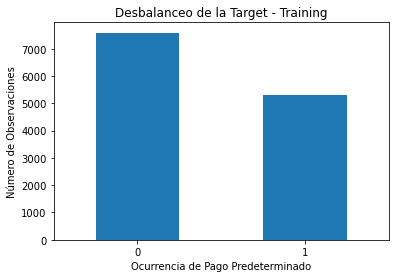

In [66]:
count_classes=pd.value_counts(df_creditcard_entrenamiento['default.payment.next.month'])
#Graficando el Desbalanceo de la Target en el Training Set balanceado
count_classes.plot(kind='bar',rot=0)
plt.title('Desbalanceo de la Target - Training')
plt.xlabel('Ocurrencia de Pago Predeterminado')
plt.ylabel('Número de Observaciones')
plt.show()

### **_3. Construir el modelo de árboles de decisión_**

In [67]:
#Creacion del modelo de arbol de decision
tree=DecisionTreeClassifier(criterion='entropy',
                           min_samples_split=20,
                           max_depth=3,
                           random_state=2020)

In [68]:
#Evaluando la validacion cruzada
score=cross_val_score(tree, # Estimator
                     xtrain_under, #Matriz de Datos
                     ytrain_under, #Target
                     scoring='accuracy', #Metrica de referencia
                     cv=10) #Numero de particiones
score

array([0.72635659, 0.73643411, 0.7255814 , 0.72924748, 0.71605896,
       0.71916214, 0.72148953, 0.70752521, 0.72692009, 0.71761055])

In [69]:
#Aprendemos de los datos de entrenamiento
tree=tree.fit(xtrain_under,ytrain_under)

### **_4. Graficar el árbol de decisión._**

In [70]:
#Iniciando proceso de grafica
with open('creditcard_dtree.dot','w') as dotfile : #W viene de write para escritura sobre el objeto
    export_graphviz(tree,
                    out_file=dotfile,
                    feature_names=predictores)
    dotfile.close()

In [71]:
#Leyendo el archivo creado
file=open('creditcard_dtree.dot','r') #r viene de read
text=file.read()
text

'digraph Tree {\nnode [shape=box] ;\n0 [label="PAY_0 <= 0.5\\nentropy = 0.977\\nsamples = 12893\\nvalue = [7584, 5309]"] ;\n1 [label="PAY_AMT2 <= 1602.5\\nentropy = 0.858\\nsamples = 9033\\nvalue = [6487, 2546]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="PAY_3 <= 1.0\\nentropy = 0.952\\nsamples = 3433\\nvalue = [2155, 1278]"] ;\n1 -> 2 ;\n3 [label="entropy = 0.925\\nsamples = 2903\\nvalue = [1914, 989]"] ;\n2 -> 3 ;\n4 [label="entropy = 0.994\\nsamples = 530\\nvalue = [241, 289]"] ;\n2 -> 4 ;\n5 [label="PAY_4 <= 1.0\\nentropy = 0.772\\nsamples = 5600\\nvalue = [4332, 1268]"] ;\n1 -> 5 ;\n6 [label="entropy = 0.743\\nsamples = 5231\\nvalue = [4127, 1104]"] ;\n5 -> 6 ;\n7 [label="entropy = 0.991\\nsamples = 369\\nvalue = [205, 164]"] ;\n5 -> 7 ;\n8 [label="PAY_0 <= 1.5\\nentropy = 0.861\\nsamples = 3860\\nvalue = [1097, 2763]"] ;\n0 -> 8 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n9 [label="PAY_5 <= 1.0\\nentropy = 0.991\\nsamples = 1777\\nv

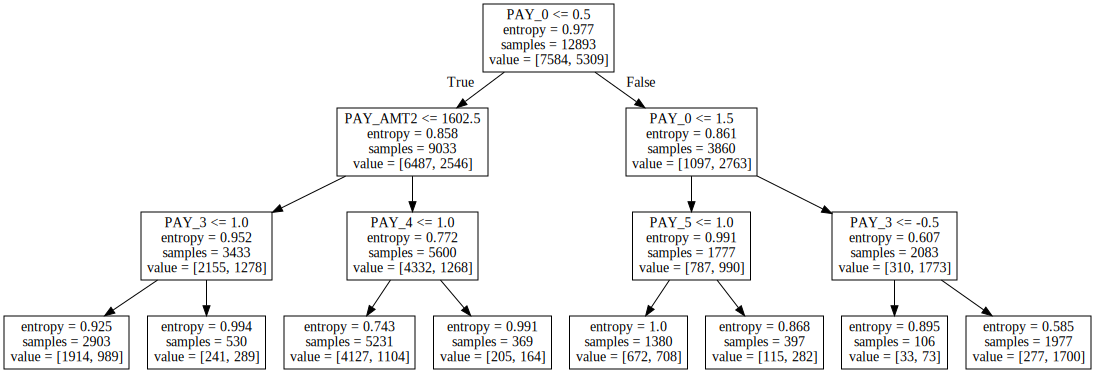

In [72]:
#Visualizando el grafico de arbol
Source(text)

### **_5. Generar las gráficas de variables importantes._**

In [73]:
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.84644316, 0.        , 0.03232047, 0.03095561, 0.01676595,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.0735148 , 0.        ,
       0.        , 0.        , 0.        ])

In [74]:
importancia_predictores = pd.DataFrame(
                            {'predictor': df_creditcard_entrenamiento.drop(columns ='default.payment.next.month').columns,
                             'importancia': tree.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
5,PAY_0,0.846443
18,PAY_AMT2,0.073515
7,PAY_3,0.032320
8,PAY_4,0.030956
9,PAY_5,0.016766
0,LIMIT_BAL,0.000000
14,BILL_AMT4,0.000000
21,PAY_AMT5,0.000000
20,PAY_AMT4,0.000000
19,PAY_AMT3,0.000000


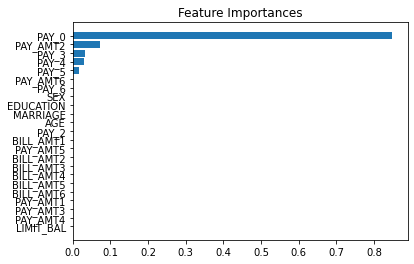

In [75]:
plt.title('Feature Importances')
plt.barh(importancia_predictores.sort_values('importancia', ascending=True).predictor,importancia_predictores.sort_values('importancia', ascending=True).importancia)
plt.show()

### **_6. Métricas de evaluación de modelos para datos de entrenamiento y testeo_**

In [76]:
prob_train=tree.predict_proba(xtrain_under)
prob_df_train_tree=pd.DataFrame(prob_train[:,1],columns=['prob y=0'])

In [77]:
punto_corte=0.5
prob_df_train_tree['prediccion']=np.where(prob_df_train_tree['prob y=0']>punto_corte,0,1)
prob_df_train_tree

,prob y=0,prediccion
0,0.340682,1
1,0.211050,1
2,0.211050,1
3,0.545283,0
4,0.211050,1
...,...,...
12888,0.859889,0
12889,0.545283,0
12890,0.513043,0
12891,0.710327,0


In [78]:
prob_test=tree.predict_proba(xtest)
prob_df_test_tree=pd.DataFrame(prob_test[:,1],columns=['prob y=0'])

In [79]:
punto_corte=0.5
prob_df_test_tree['prediccion']=np.where(prob_df_test_tree['prob y=0']>punto_corte,0,1)
prob_df_test_tree

,prob y=0,prediccion
0,0.340682,1
1,0.211050,1
2,0.211050,1
3,0.545283,0
4,0.211050,1
...,...,...
5995,0.710327,0
5996,0.513043,0
5997,0.859889,0
5998,0.513043,0


##### **METRICAS PARA DATA DE ENTRENAMIENTO**

In [80]:
cm_train=pd.crosstab(ytrain_under,prob_df_train_tree['prediccion'])
cm_train

prediccion,0,1
row_0,,
0,1338,6246
1,3052,2257


In [81]:
VP_train=cm_train[0][0]
VN_train=cm_train[1][1]
FP_train=cm_train[1][0]
FN_train=cm_train[0][1]

In [82]:
accuracy_train_tree=(VP_train+VN_train)/(VP_train+VN_train+FP_train+FN_train)
print('El accuracy para la Data de Entrenamiento es: ', accuracy_train_tree.round(3))

El accuracy para la Data de Entrenamiento es:  0.279


In [83]:
sensibilidad_train_tree=(VP_train)/(VP_train+FN_train)
print('La sensibilidad para la Data de Entrenamiento es: ', sensibilidad_train_tree.round(3))

La sensibilidad para la Data de Entrenamiento es:  0.305


In [84]:
especificidad_train_tree=(VN_train)/(VN_train+FP_train)
print('La especificidad para la Data de Entrenamiento es: ', especificidad_train_tree.round(3))

La especificidad para la Data de Entrenamiento es:  0.265


In [85]:
#Para calcular de la curva ROC y AUC, la función roc_curve exige que las categorias sean 0 y 1
fpr,tpr,thresholds=roc_curve(ytrain_under,prob_df_train_tree['prediccion'])
auc_train_tree=auc(fpr,tpr)
print('El area Bajo la Curva(AUC) para Data de Entrenamiento es: ',auc_train_tree.round(3))

El area Bajo la Curva(AUC) para Data de Entrenamiento es:  0.301


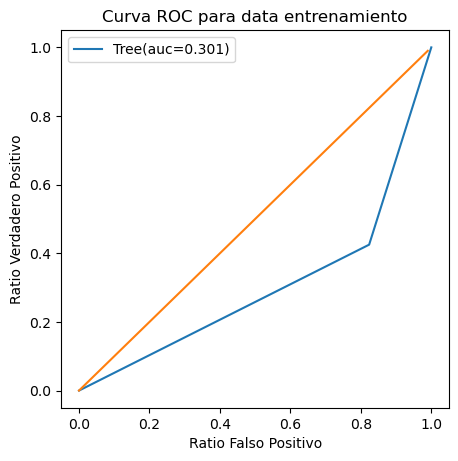

In [86]:
plt.figure(figsize=(5,5),dpi=100)
plt.plot(fpr,tpr,linestyle='-',label="Tree(auc=%0.3f)"%auc_train_tree)
plt.title('Curva ROC para data entrenamiento')
plt.xlabel('Ratio Falso Positivo')
plt.ylabel('Ratio Verdadero Positivo')
plt.legend()

x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y)
plt.show()

##### **METRICAS PARA DATA DE TESTING**

In [87]:
cm_test=pd.crosstab(ytest,prob_df_test_tree['prediccion'])
cm_test

prediccion,0,1
row_0,,
0,859,3814
1,736,591


In [88]:
VP_test=cm_test[0][0]
VN_test=cm_test[1][1]
FP_test=cm_test[1][0]
FN_test=cm_test[0][1]

In [89]:
accuracy_test_tree=(VP_test+VN_test)/(VP_test+VN_test+FP_test+FN_test)
print('El accuracy para la Data de Testeo es: ', accuracy_test_tree.round(3))

El accuracy para la Data de Testeo es:  0.242


In [90]:
sensibilidad_test_tree=(VP_test)/(VP_test+FN_test)
print('La sensibilidad para la Data de Testeo es: ', sensibilidad_test_tree.round(3))

La sensibilidad para la Data de Testeo es:  0.539


In [91]:
especificidad_test_tree=(VN_test)/(VN_test+FP_test)
print('La especificidad para la Data de Testeo es: ', especificidad_test_tree.round(3))

La especificidad para la Data de Testeo es:  0.134


In [92]:
#Para calcular de la curva ROC y AUC, la función roc_curve exige que las categorias sean 0 y 1
fpr,tpr,thresholds=roc_curve(ytest,prob_df_test_tree['prediccion'])
auc_test_tree=auc(fpr,tpr)
print('El area Bajo la Curva(AUC) para Data de Entrenamiento es: ',auc_test_tree.round(3))

El area Bajo la Curva(AUC) para Data de Entrenamiento es:  0.315


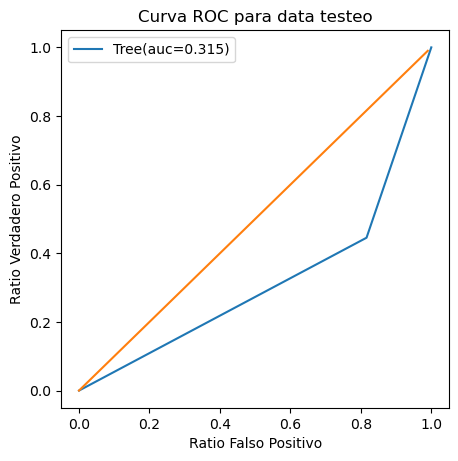

In [93]:
plt.figure(figsize=(5,5),dpi=100)
plt.plot(fpr,tpr,linestyle='-',label="Tree(auc=%0.3f)"%auc_test_tree)
plt.title('Curva ROC para data testeo')
plt.xlabel('Ratio Falso Positivo')
plt.ylabel('Ratio Verdadero Positivo')
plt.legend()

x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y)
plt.show()